<font size = 6 color = red >
Dataset Description:

images_training: JPG images of 61578 galaxies. Files are named according to their GalaxyId.<br>
solutions_training: Probability distributions for the classifications for each of the training images.<br>
images_test: JPG images of 79975 galaxies. Files are name according to their GalaxyId. You will provide probabilities for each of these images.<br>
all_ones_benchmark: Sample submission file corresponding to the All Ones Benchmark<br>
all_zeros_benchmark: Sample submission file corresponding to the All Zeros Benchmark<br>
central_pixel_benchmark: Simple benchmark that clusters training galaxies according to the color in the center of the image and then assigns the associated probability values to like-colored images in the test set.<br>
The first column in each solution is labeled GalaxyID; <br>this is a randomly-generated ID that only allows you to match the probability distributions with the images.<br> The next 37 columns are all floating point numbers between 0 and 1 inclusive. These represent the morphology (or shape) of the galaxy in 37 different categories as identified by crowdsourced volunteer classifications as part of the Galaxy Zoo 2 project.<br> These morphologies are related to probabilities for each category; a high number (close to 1) indicates that many users identified this morphology category for the galaxy with a high level of confidence. Low numbers for a category (close to 0) indicate the feature is likely not present.
<br>
<font size =6 color = blue>
$$\text{List of Questions}$$
<br>
Q1. Is the object a smooth galaxy, a galaxy with features/disk or a star? 3 responses<br>
Q2. Is it edge-on? 2 responses<br>
Q3. Is there a bar? 2 responses<br>
Q4. Is there a spiral pattern? 2 responses<br>
Q5. How prominent is the central bulge? 4 responses<br>
Q6. Is there anything "odd" about the galaxy? 2 responses<br>
Q7. How round is the smooth galaxy? 3 responses<br>
Q8. What is the odd feature? 7 responses<br>
Q9. What shape is the bulge in the edge-on galaxy? 3 responses<br>
Q10. How tightly wound are the spiral arms? 3 responses<br>
Q11. How many spiral arms are there? 6 responses

<br>
<font size =6 color = blue>
$$\text{training_solutions_rev1 Dataset Description}$$
<br>
\begin{array}{|c|c|} \hline
Column & \text{ Description Of Galaxy }\\ \hline
GalaxyID & \text{A unique identifier for each galaxy.}  \\ \hline
\text{Class1.1 to Class11.6} & \text{Probabilities show  # volunteers choose specific answer for a series of questions about morphology.}
 \\ \hline
\end{array}<br>


<font size= 9 color=blue>
    <b>Galaxy Zoo: training_solutions_rev1 Dataset Description</b>
</font>
<br><br>
<table border="1" style="border-collapse: collapse; font-size: 30px;">
<thead>
<tr><th>Column</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>GalaxyID</td><td>A unique identifier for each galaxy.</td></tr>
<tr><td>Class1.1</td><td>Is the galaxy smooth and rounded with no sign of a disk? — Smooth</td></tr>
<tr><td>Class1.2</td><td>Is the galaxy smooth and rounded with no sign of a disk? — Features or Disk</td></tr>
<tr><td>Class1.3</td><td>Is the galaxy smooth and rounded with no sign of a disk? — Star or Artifact</td></tr>

<tr><td>Class2.1</td><td>How rounded is it? — Completely Round</td></tr>
<!-- <tr><td>Class2.2</td><td>How rounded is it? — In-Between</td></tr> -->
<tr><td>Class2.2</td><td>How rounded is it? — Cigar-Shaped</td></tr>

<tr><td>Class3.1</td><td>Does the galaxy have a disk or is it edge-on? — Yes</td></tr>
<tr><td>Class3.2</td><td>Does the galaxy have a disk or is it edge-on? — No</td></tr>

<tr><td>Class4.1</td><td>Is the galaxy edge-on? — Yes</td></tr>
<tr><td>Class4.2</td><td>Is the galaxy edge-on? — No</td></tr>

<tr><td>Class5.1</td><td>Does the galaxy have a bar feature? — Yes</td></tr>
<tr><td>Class5.2</td><td>Does the galaxy have a bar feature? — No</td></tr>

<tr><td>Class6.1</td><td>Is there any sign of a spiral arm pattern? — Yes</td></tr>
<tr><td>Class6.2</td><td>Is there any sign of a spiral arm pattern? — No</td></tr>

<tr><td>Class7.1 – Class7.6</td><td>How many spiral arms are there? — 1, 2, 3, 4, 5+, Can't Tell</td></tr>

<tr><td>Class8.1 – Class8.4</td><td>How prominent is the central bulge? — No Bulge, Just Noticeable, Obvious, Dominant</td></tr>

<tr><td>Class9.1</td><td>Is there anything odd? — Yes</td></tr>
<tr><td>Class9.2</td><td>Is there anything odd? — No</td></tr>

<tr><td>Class10.1 – Class10.6</td><td>What kind of odd feature is present? — Ring, Lens or Arc, Disturbed, Irregular, Other, Merger</td></tr>

<tr><td>Class11.1 – Class11.3</td><td>Is the galaxy merging or interacting? — Yes, No, Can't Tell</td></tr>
</tbody>
</table>




0.0 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

Mounted at /content/drive


In [ ]:
for root, dirs, files in os.walk(extract_path):
    for file in files[:10]:  # Display only first 10
        print(os.path.join(root, file))


/content/images_training/images_training_rev1/649139.jpg
/content/images_training/images_training_rev1/729923.jpg
/content/images_training/images_training_rev1/679936.jpg
/content/images_training/images_training_rev1/961122.jpg
/content/images_training/images_training_rev1/586643.jpg
/content/images_training/images_training_rev1/591983.jpg
/content/images_training/images_training_rev1/383480.jpg
/content/images_training/images_training_rev1/728676.jpg
/content/images_training/images_training_rev1/185928.jpg
/content/images_training/images_training_rev1/835226.jpg


In [ ]:
for root, dirs, files in os.walk(extract_path):
    for file in files[:10]:  # Display only first 10
        print(os.path.join(root, file))

In [ ]:
image_folder = "/content/images_training/images_training_rev1"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Load and display the first image
if image_files:
    img_path = os.path.join(image_folder, image_files[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Image: {image_files[0]}")
    plt.show()
else:
    print("No image files found in the folder.")


In [ ]:
image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Display first 6 images
plt.figure(figsize=(15, 8))
for i in range(6):
    if i < len(image_files):
        img_path = os.path.join(image_folder, image_files[i])
        img = mpimg.imread(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(image_files[i], fontsize=10)
        plt.axis('off')
    else:
        break

plt.tight_layout()
plt.show()


In [ ]:
len(image_files)

61578

# Finding elliptical & spiral in the training_solutions_rev1 dataset

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/training_solutions_rev1.zip",
                   compression="zip")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

<font size = 5 color = darkred>
For the 80% of users that identified the galaxy as "smooth", they also recorded responses for the galaxy's relative roundness. These votes were for 50% completely round, 25% in-between, and 25% cigar-shaped.

In [ ]:
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
import janitor
data = data.clean_names(remove_special=True)

print(data)

       galaxyid  class1_1  class1_2  class1_3  class2_1  class2_2  class3_1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       class3_2  class4_1  class4_2  ...  class9_3 

In [ ]:
data

galaxyid  class1_1  class1_2  class1_3  class2_1  class2_2  class3_1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       class3_2  class4_1  class4_2  ...  class9_3  class10_1  class10_2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       class10_3  class11_1  class11_2  class11_3  class11_4  class11_5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       class11_6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

In [ ]:
class1n2 = data['Class1.1'] + data['Class1.2']
sum(class1n2 >= 0.5)

61534

In [ ]:
data.shape

(61578, 38)

In [ ]:
data.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  float64
 19  Class8.1   61578 non-null  float64
 20  Class8

In [ ]:
pd.set_option('display.max_columns', None)
data.describe()

GalaxyID      Class1.1      Class1.2      Class1.3      Class2.1  \
count   61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean   550179.708337      0.432526      0.542261      0.025213      0.106408   
std    258724.130197      0.283517      0.296429      0.037967      0.212505   
min    100008.000000      0.000000      0.000000      0.000000      0.000000   
25%    327874.250000      0.175812      0.280862      0.000000      0.000000   
50%    551933.000000      0.416994      0.558754      0.014870      0.000000   
75%    773232.000000      0.679182      0.811339      0.034325      0.085161   
max    999967.000000      1.000000      1.000000      0.935147      1.000000   

           Class2.2      Class3.1      Class3.2      Class4.1      Class4.2  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.435854      0.102526      0.333328      0.215629      0.220224   
std        0.301867      0.177301      0.247675      0.285502      0.179835   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.168490      0.000000      0.122592      0.000000      0.072656   
50%        0.394850      0.000000      0.289248      0.092987      0.183640   
75%        0.694615      0.134555      0.516800      0.330231      0.338920   
max        1.000000      1.000000      1.000000      1.000000      0.957937   

           Class5.1      Class5.2      Class5.3      Class5.4      Class6.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.040842      0.180468      0.177904      0.036639      0.231807   
std        0.087419      0.192508      0.180277      0.060300      0.227393   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.066087   
50%        0.000000      0.116580      0.126765      0.000000      0.149545   
75%        0.044376      0.290133      0.284554      0.057294      0.326943   
max        0.803556      0.965112      0.891034      0.650383      1.000000   

           Class6.2      Class7.1      Class7.2      Class7.3      Class8.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.768193      0.170021      0.207765      0.054740      0.034812   
std        0.227393      0.238860      0.215967      0.110445      0.101319   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.673056      0.000000      0.032554      0.000000      0.000000   
50%        0.850455      0.035954      0.125757      0.000000      0.000000   
75%        0.933913      0.280679      0.333788      0.049136      0.027767   
max        1.000000      1.000000      1.000000      0.883481      0.969157   

           Class8.2      Class8.3      Class8.4      Class8.5      Class8.6  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.013449      0.032807      0.040044      0.064546      0.042307   
std        0.027435      0.051930      0.081152      0.090286      0.108537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.034163      0.000000   
75%        0.025160      0.046129      0.044907      0.086541      0.032199   
max        0.807733      0.598390      0.860000      0.790470      0.971000   

           Class8.7      Class9.1      Class9.2      Class9.3     Class10.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.003842      0.063014      0.010614      0.032780      0.091801   
std        0.024408      0.137545      0.038236      0.098200      0.145125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000 

In [ ]:
!pip install dfsummary


In [ ]:
!pip install summarytools
from summarytools import dfSummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.2 MB/s eta 0:00:00


In [ ]:
dfSummary(data)


## 1.1 Galaxy IDs

In [ ]:
data['GalaxyID'].unique(),len(data['GalaxyID'].unique())

(array([100008, 100023, 100053, ..., 999958, 999964, 999967]), 61578)

In [ ]:
plt.hist(data['GalaxyID'],bins = 61578)
plt.title('GalaxyID Distribution')
plt.xlabel('GalaxyID')
plt.ylabel('Frequency')
plt.show()

## Class 1.1

In [ ]:
data['Class1.1'].unique(),len(data['Class1.1'].unique())

(array([0.383147, 0.327001, 0.765717, ..., 0.545443, 0.901216, 0.202841]),
 55153)

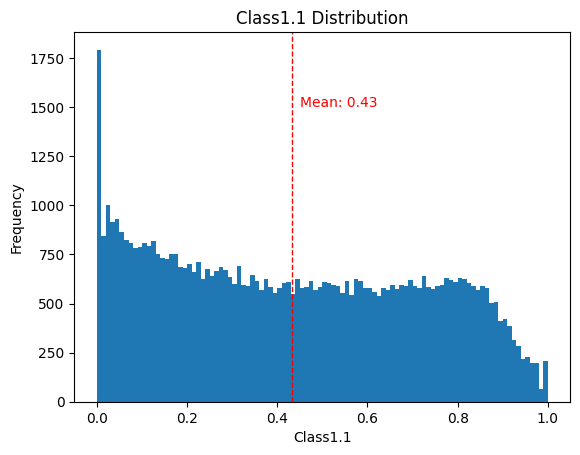

In [ ]:
import matplotlib.pyplot as plt
mean_class11 = data['Class1.1'].mean()

plt.hist(data['Class1.1'], bins=100)
plt.title('Class1.1 Distribution')
plt.xlabel('Class1.1')
plt.ylabel('Frequency')
plt.axvline(mean_class11, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_class11:.2f}')
plt.text(0.45,1500, s = f'Mean: {mean_class11:.2f}', color = 'red')
# plt.legend()
plt.show()


In [ ]:
plt.hist(data['Class1.1'],bins = 100)
plt.title('Class1.1 Distribution')
plt.xlabel('Class1.1')
plt.ylabel('Frequency')
# plt.yticks(np.arange(0, 201, step=50))
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
mean_class11 = data['Class1.1'].mean()

plt.hist(data['Class1.1'], bins=100)
plt.title('Class1.1 Distribution')
plt.xlabel('Class1.1')
plt.ylabel('Frequency')
plt.axvline(mean_class11, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_class11:.2f}')
plt.text(0.45,1500, s = f'Mean: {mean_class11:.2f}', color = 'red')
# plt.legend()

plt.subplot(2,1,2)
plt.boxplot(data['Class1.1'],orientation='horizontal')
plt.title('Boxplot of Class1.1')
plt.ylabel('Class1.1')

plt.tight_layout()
plt.show()

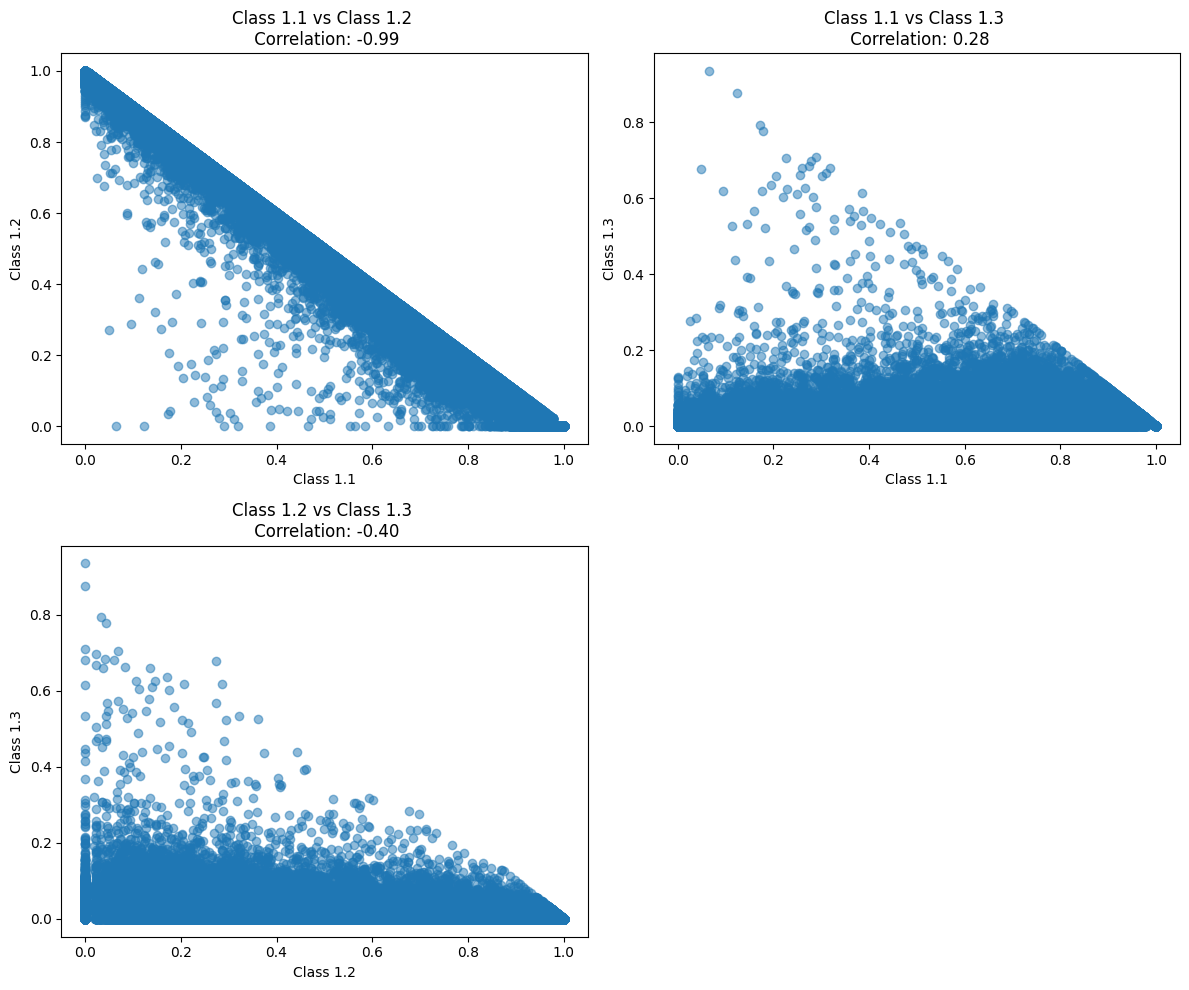

In [ ]:
# Calculate correlations
corr11_12 = data['Class1.1'].corr(data['Class1.2'])
corr11_13 = data['Class1.1'].corr(data['Class1.3'])
corr12_13 = data['Class1.2'].corr(data['Class1.3'])

# Create a 2x2 matrix of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Class1.1 vs Class1.2
axes[0, 0].scatter(data['Class1.1'], data['Class1.2'], alpha=0.5)
axes[0, 0].set_title(f'Class 1.1 vs Class 1.2 \n Correlation: {corr11_12:.2f}')
axes[0, 0].set_xlabel('Class 1.1')
axes[0, 0].set_ylabel('Class 1.2')


# Plot Class1.1 vs Class1.3
axes[0, 1].scatter(data['Class1.1'], data['Class1.3'], alpha=0.5)
axes[0, 1].set_title(f'Class 1.1 vs Class 1.3 \n Correlation: {corr11_13:.2f}')
axes[0, 1].set_xlabel('Class 1.1')
axes[0, 1].set_ylabel('Class 1.3')

# Plot Class1.2 vs Class1.3
axes[1, 0].scatter(data['Class1.2'], data['Class1.3'], alpha=0.5)
axes[1, 0].set_title(f'Class 1.2 vs Class 1.3 \n Correlation: {corr12_13:.2f}')
axes[1, 0].set_xlabel('Class 1.2')
axes[1, 0].set_ylabel('Class 1.3')


# Remove the empty subplot
fig.delaxes(axes[1,1])


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def append_ext(filename):
    """ Appends `.jpg` file extension to a filename """
    return f"{filename}.jpg"
    #return filename + '.jpg'

#applying the function to the GalaxyID colunm
data["GalaxyID"] = data["GalaxyID"].apply(append_ext)

#printing the first five row of the dataframe to view the changes
data.head(5)

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0  100008.jpg  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1  100023.jpg  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2  100053.jpg  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3  100078.jpg  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4  100090.jpg  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  Class5.1  Class5.2  Class5.3  Class5.4  \
0  0.578401  0.418398  0.198455       0.0  0.104752  0.512101  0.000000   
1  0.165229  0.591328  0.041271       0.0  0.236781  0.160941  0.234877   
2  0.177352  0.000000  0.177352       0.0  0.117790  0.059562  0.000000   
3  0.129071  0.189098  0.049466       0.0  0.000000  0.113284  0.125280   
4  0.000000  0.000000  0.000000       0.0  0.000000  0.000000  0.000000   

   Class6.1  Class6.2  Class7.1  Class7.2  Class7.3  Class8.1  Class8.2  \
0  0.054453  0.945547  0.201463  0.181684  0.000000       0.0  0.027227   
1  0.189149  0.810851  0.000000  0.135082  0.191919       0.0  0.000000   
2  0.000000  1.000000  0.000000  0.741864  0.023853       0.0  0.000000   
3  0.320398  0.679602  0.408599  0.284778  0.000000       0.0  0.000000   
4  0.029383  0.970617  0.494587  0.439252  0.000000       0.0  0.000000   

   Class8.3  Class8.4  Class8.5  Class8.6  Class8.7  Class9.1  Class9.2  \
0  0.000000  0.027227  0.000000  0.000000       0.0  0.000000       0.0   
1  0.140353  0.000000  0.048796  0.000000       0.0  0.012414       0.0   
2  0.000000  0.000000  0.000000  0.000000       0.0  0.000000       0.0   
3  0.096119  0.096119  0.000000  0.128159       0.0  0.000000       0.0   
4  0.000000  0.000000  0.000000  0.029383       0.0  0.000000       0.0   

   Class9.3  Class10.1  Class10.2  Class10.3  Class11.1  Class11.2  Class11.3  \
0  0.000000   0.279952   0.138445   0.000000   0.000000   0.092886        0.0   
1  0.018764   0.000000   0.131378   0.459950   0.000000   0.591328        0.0   
2  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3  0.000000   0.094549   0.000000   0.094549   0.189098   0.000000        0.0   
4  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

   Class11.4  Class11.5  Class11.6  
0        0.0        0.0   0.325512  
1        0.0        0.0   0.000000  
2        0.0        0.0   0.000000  
3        0.0        0.0   0.000000  
4        0.0        0.0   0.000000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/training_solutions_rev1.csv")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [ ]:
q1_cols = ["Class1.1", "Class1.2", "Class1.3"]

In [ ]:
thresholds = np.arange(0.5, 1.0, 0.05)  # from 0.5 to 0.95
samples_kept = []


In [ ]:
for threshold in thresholds:
    # For each row, check if any class for Q1 is >= threshold
    mask = (data[q1_cols] >= threshold).any(axis=1)
    count = mask.sum()  # How many galaxies pass the threshold
    samples_kept.append(count)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, samples_kept, marker='o')
plt.title('Samples Kept vs Threshold (for Q1)')
plt.xlabel('Threshold')
plt.ylabel('Number of Galaxies Kept')
plt.text(x = 0.7, y = 50000, s = "As threshold increases,\n the number of galaxies kept decreases.",color ='red', size = 10)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assume new_data is your dataframe
q1_cols = ["Class1.1", "Class1.2", "Class1.3"]

thresholds = np.arange(0.5, 1.0, 0.05)
total_samples = len(data)

# Empty lists to collect results
samples_kept = []
data_loss = []

for threshold in thresholds:
    mask = (data[q1_cols] >= threshold).any(axis=1)
    kept = mask.sum()
    samples_kept.append(kept)

    loss = (1 - (kept / total_samples)) * 100
    data_loss.append(loss)

# Create a result table
result_table = pd.DataFrame({
    "Threshold": thresholds,
    "Samples Kept": samples_kept,
    "Data Loss (%)": data_loss
})

# Display the table
print(result_table)


   Threshold  Samples Kept  Data Loss (%)
0       0.50         60023       2.525253
1       0.55         54241      11.914970
2       0.60         48509      21.223489
3       0.65         42816      30.468674
4       0.70         36816      40.212414
5       0.75         30614      50.284192
6       0.80         24247      60.623924
7       0.85         17734      71.200754
8       0.90         11278      81.685017
9       0.95          5723      90.706096


In [ ]:
new_data = data[((data["Class1.1"] >= .8) | (data["Class1.2"] >= .8))].reset_index(drop=True)
print(new_data.shape)
new_data.head(5)

(24273, 38)


GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0  100090.jpg  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
1  100134.jpg  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
2  100237.jpg  0.164391  0.800759  0.034850  0.030795  0.769964  0.149037   
3  100263.jpg  0.179654  0.818530  0.001816  0.573791  0.244739  0.047326   
4  100322.jpg  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
1  0.642124  0.546491  0.408711  ...  0.021751   0.207253   0.152044   
2  0.620928  0.387742  0.382223  ...  0.000000   0.208685   0.179056   
3  0.197413  0.016623  0.228116  ...  0.141605   0.000000   0.007855   
4  0.091207  0.000000  0.091207  ...  0.142815   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000  
1   0.187194   0.000000    0.00000   0.054649   0.081974   0.081974   0.327894  
2   0.000000   0.032728    0.14098   0.000000   0.000000   0.089185   0.124848  
3   0.008768   0.000000    0.00000   0.000000   0.000000   0.000000   0.016623  
4   0.000000   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000  

[5 rows x 38 columns]

In [ ]:
new_data.drop_duplicates(inplace=True)
new_data.shape

(24273, 38)

In [ ]:
new_data.isnull().sum().sum()

np.int64(0)

In [ ]:
conditions = [new_data["Class1.1"] >= 0.8,
              new_data["Class1.2"] >= 0.8]

#define choices
choices = ["elliptical", "spiral"]

#create new column in DataFrame that displays results of comparisons
new_data["class"] = np.select(conditions, choices, default="Tie")

new_data

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0      100090.jpg  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
1      100134.jpg  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
2      100237.jpg  0.164391  0.800759  0.034850  0.030795  0.769964  0.149037   
3      100263.jpg  0.179654  0.818530  0.001816  0.573791  0.244739  0.047326   
4      100322.jpg  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
24268  999786.jpg  0.800415  0.165614  0.033971  0.000000  0.165614  0.044163   
24269  999795.jpg  0.129878  0.867781  0.002341  0.066500  0.801281  0.598990   
24270  999875.jpg  0.020285  0.979715  0.000000  0.207551  0.772164  0.315305   
24271  999950.jpg  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
24272  999964.jpg  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0      0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
1      0.642124  0.546491  0.408711  ...   0.207253   0.152044   0.187194   
2      0.620928  0.387742  0.382223  ...   0.208685   0.179056   0.000000   
3      0.197413  0.016623  0.228116  ...   0.000000   0.007855   0.008768   
4      0.091207  0.000000  0.091207  ...   0.000000   0.000000   0.000000   
...         ...       ...       ...  ...        ...        ...        ...   
24268  0.121451  0.089182  0.076432  ...   0.044591   0.044591   0.000000   
24269  0.202291  0.550301  0.250981  ...   0.249742   0.172674   0.127884   
24270  0.456860  0.722483  0.049681  ...   0.074294   0.029641   0.618548   
24271  0.098784  0.000000  0.098784  ...   0.000000   0.000000   0.000000   
24272  0.841098  0.795330  0.068220  ...   0.068398   0.318132   0.408799   

       Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1       0.000000   0.000000   0.054649   0.081974   0.081974   0.327894   
2       0.032728   0.140980   0.000000   0.000000   0.089185   0.124848   
3       0.000000   0.000000   0.000000   0.000000   0.000000   0.016623   
4       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...          ...        ...        ...        ...        ...        ...   
24268   0.000000   0.000000   0.000000   0.000000   0.000000   0.089182   
24269   0.142373   0.048823   0.038712   0.000000   0.123529   0.196864   
24270   0.027295   0.638331   0.000000   0.000000   0.000000   0.056857   
24271   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
24272   0.227464   0.408799   0.090668   0.023065   0.000000   0.045334   

            class  
0      elliptical  
1          spiral  
2          spiral  
3          spiral  
4          spiral  
...           ...  
24268  elliptical  
24269      spiral  
24270      spiral  
24271  elliptical  
24272      spiral  

[24273 rows x 39 columns]

In [ ]:
print(new_data[new_data["class"] == "elliptical"].shape)

print(new_data[new_data["class"] == "spiral"].shape)

(8132, 39)
(16141, 39)


In [ ]:
df_spiral = new_data[new_data["class"] == "spiral"].sample(n=8000,random_state = 42)
print("This is a sample of spiral galaxies")
print(df_spiral.head(5))
print(df_spiral.shape)

df_elliptical =new_data[new_data["class"] == "elliptical"].sample(n=8000,random_state = 42)
print("And this is a sample of elliptical galaxies")
print(df_elliptical.head(5))
print(df_elliptical.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
20666  863568.jpg  0.055449  0.944551  0.000000  0.894966  0.049585  0.000000   
17422  745024.jpg  0.170517  0.829483  0.000000  0.593576  0.235907  0.000000   
23878  985580.jpg  0.096710  0.903290  0.000000  0.903290  0.000000  0.000000   
15765  684719.jpg  0.048381  0.951619  0.000000  0.034938  0.916681  0.287033   
6305   340999.jpg  0.074525  0.897899  0.027576  0.000000  0.897899  0.441543   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
20666  0.049585  0.000000  0.049585  ...   0.000000   0.000000   0.000000   
17422  0.235907  0.000000  0.235907  ...   0.000000   0.000000   0.000000   
23878  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
15765  0.629648  0.790393  0.126288  ...   0.188969   0.427433   0.173989   
6305   0.456356  0.806458  0.091441  ...   0.142079   0.522301   0.142079   

       Class11

In [ ]:
frames = [df_spiral, df_elliptical]
df_galaxies = pd.concat(frames)
df_galaxies = df_galaxies[["GalaxyID", "class"]]
df_galaxies.head(5)

GalaxyID   class
20666  863568.jpg  spiral
17422  745024.jpg  spiral
23878  985580.jpg  spiral
15765  684719.jpg  spiral
6305   340999.jpg  spiral

In [ ]:
df_galaxies.shape

(16000, 2)

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/images_training_rev1.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#images
img= image.load_img("./images_training_rev1/104934.jpg")
img2 = image.load_img("./images_training_rev1/582003.jpg")

#Subplots
plt.figure(figsize=(12,4.5))
plt.subplot(141)
plt.imshow(img)
plt.title("Spiral Galaxy", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title("Elliptical Galaxy", y=1.02, fontsize=12)

Text(0.5, 1.02, 'Elliptical Galaxy')

In [ ]:
import cv2

print("The images are of size: ")
cv2.imread("./images_training_rev1/104934.jpg").shape

The images are of size: 


(424, 424, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import os

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,
                           validation_split=0.2,

)


train_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                          target_size = (224,224),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode="rgb",
                                          class_mode="categorical",
                                          subset="training",
                                          shuffle=True,
                                          seed=42
                                         )
valid_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                            target_size=(224, 224),
                                            directory = "./images_training_rev1",
                                            batch_size=32,
                                            x_col="GalaxyID",
                                            y_col="class",
                                            color_mode="rgb",
                                            class_mode="categorical",
                                            subset="validation",
                                            shuffle=True,
                                            seed=42
                                           )

Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'elliptical': 0, 'spiral': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(6,6),activation = 'relu',
                                                           input_shape=(224,224,3)),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),

                                  #
                                  tf.keras.layers.Conv2D(32,(5,5),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),

                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),

                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),

                                  #
                                  tf.keras.layers.Flatten(),

                                  #
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),

                                  tf.keras.layers.Dense(256, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),

                                   #
                                  tf.keras.layers.Dense(2, activation='softmax')
                                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
summary = model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 219, 219, 16)   │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 105, 105, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,930,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,169,138 (31.16 MB)

 Trainable params: 8,169,138 (31.16 MB)

 Non-trainable params: 0 (0.00 B)

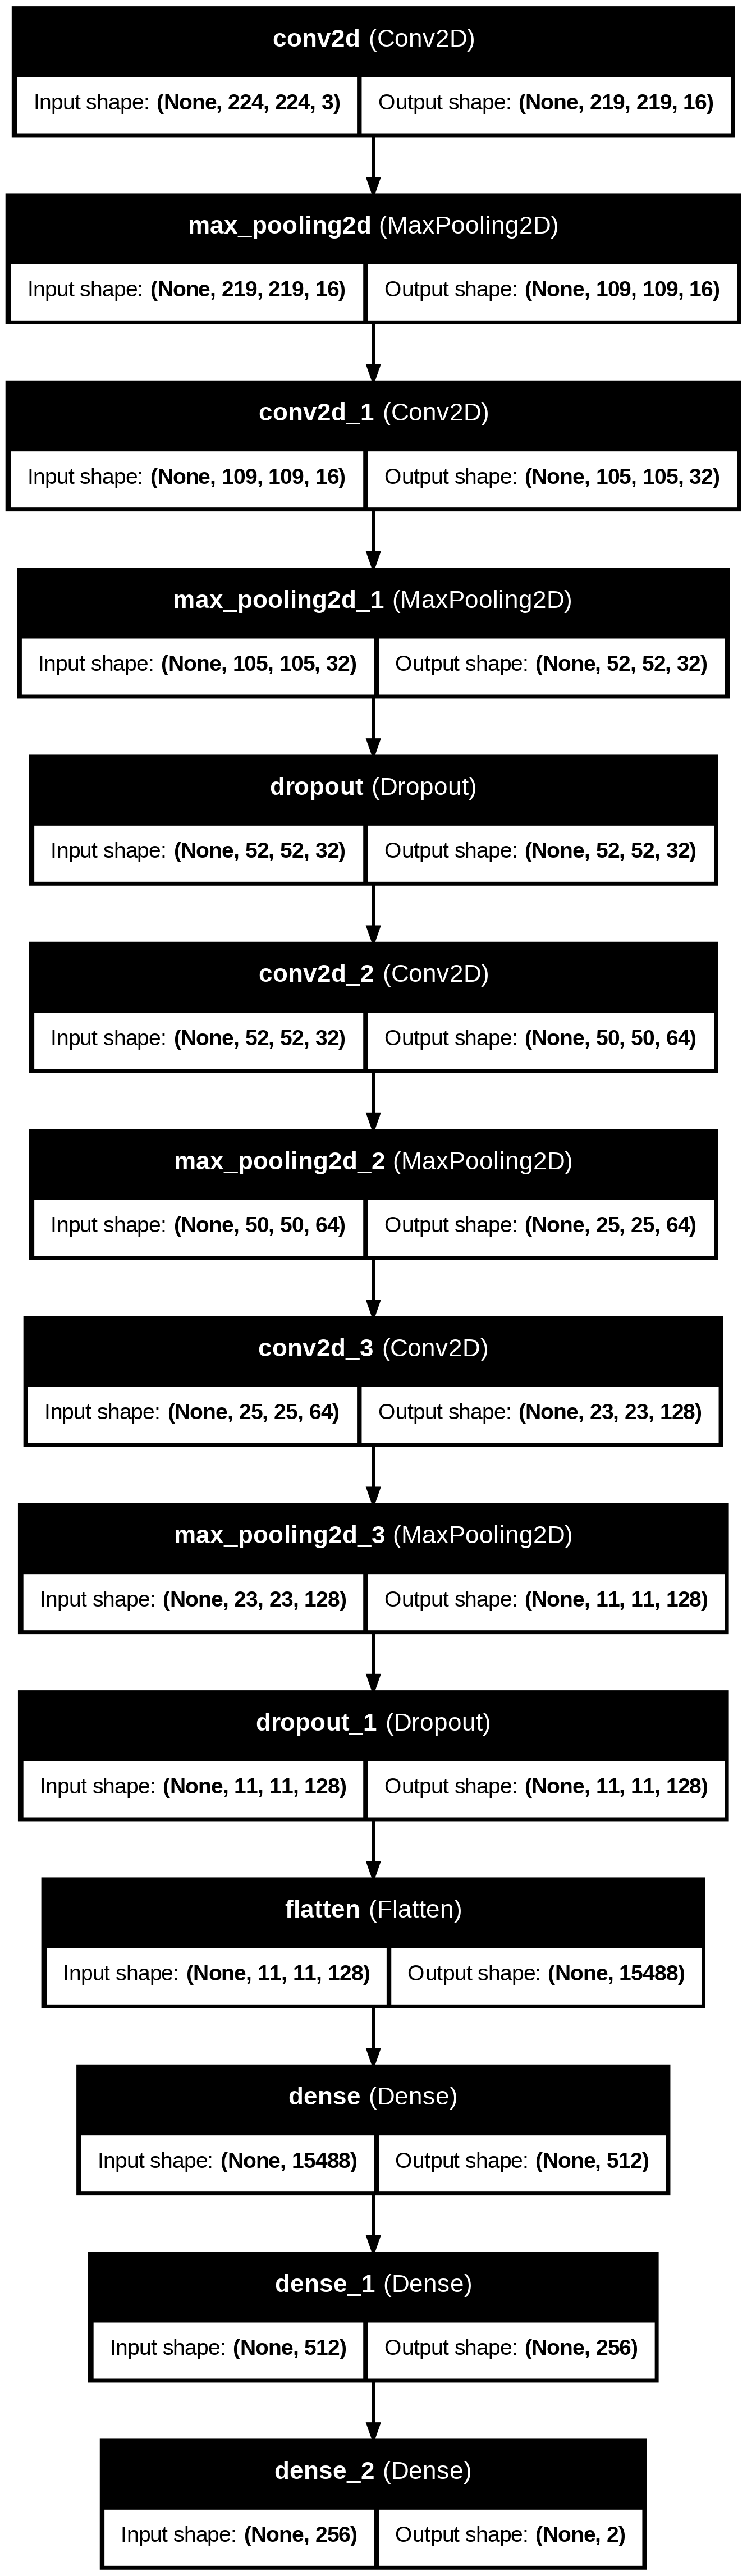

In [ ]:
tf.keras.utils.plot_model(model, to_file="model_plot3.png",
                          show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(
loss="categorical_crossentropy",
optimizer=Adam(learning_rate=0.001),
metrics=["accuracy"])

In [ ]:
hist = model.fit(train_generator, epochs = 10, validation_data=valid_generator
                )

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 97ms/step - accuracy: 0.7626 - loss: 0.4829 - val_accuracy: 0.9072 - val_loss: 0.2712
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.9147 - loss: 0.2194 - val_accuracy: 0.9269 - val_loss: 0.2088
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9399 - loss: 0.1620 - val_accuracy: 0.9375 - val_loss: 0.1977
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9485 - loss: 0.1281 - val_accuracy: 0.9212 - val_loss: 0.2443
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 33s 81ms/step - accuracy: 0.9531 - loss: 0.1220 - val_accuracy: 0.7772 - val_loss: 0.5287
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9667 - loss: 0.0867 - val_accuracy: 0.9450 - val_loss: 0.1707
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - accuracy: 0.9764 - loss: 0.0624 - val_accuracy: 0.9097 - val_loss: 0.3077
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.9784 - loss: 0.0553 - val_accura

In [ ]:
final_train_acc = hist.history['accuracy'][-1]
final_val_acc = hist.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9845
Final Validation Accuracy: 0.9334


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reset generator and predict on the full validation set
valid_generator.reset()
y_pred_probs = model.predict(valid_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = valid_generator.classes  # works if shuffle=False

# Accuracy score
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {acc:.4f}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step
Validation Accuracy: 0.9334


# Evaluate Model Performance on Test/Validation Set

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation data
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = valid_generator.classes
class_labels = list(valid_generator.class_indices.keys())

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step
Classification Report:

              precision    recall  f1-score   support

  elliptical       0.00      0.00      0.00         0
      spiral       1.00      0.93      0.97      3200

    accuracy                           0.93      3200
   macro avg       0.50      0.47      0.48      3200
weighted avg       1.00      0.93      0.97      3200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix Visualization

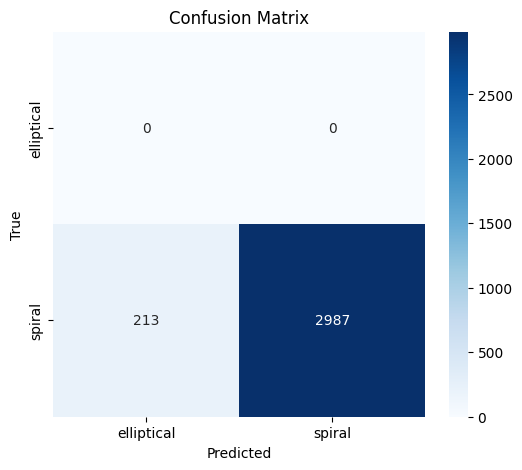

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Training & Validation Accuracy/Loss Plots



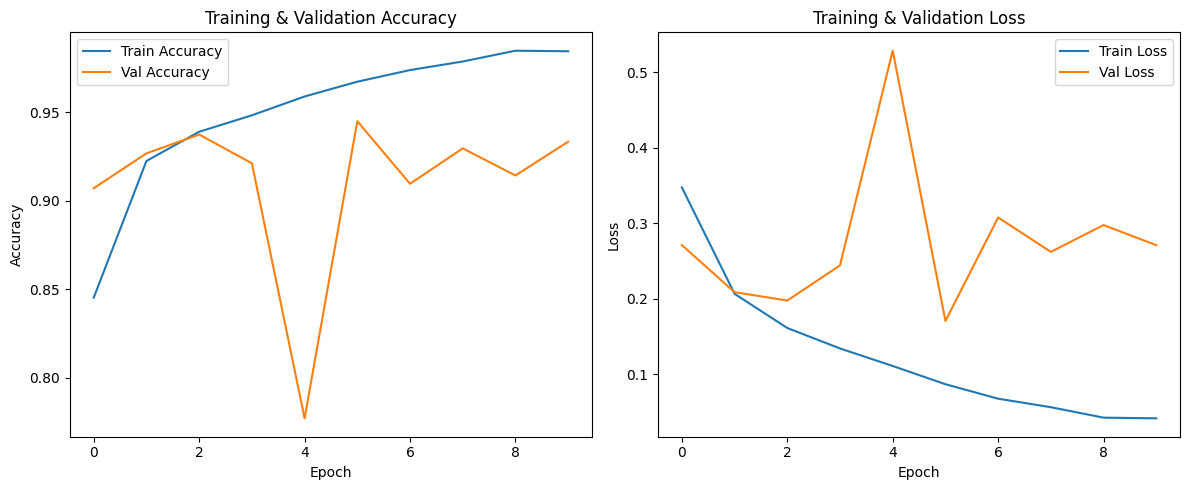

In [ ]:
# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Show Some Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


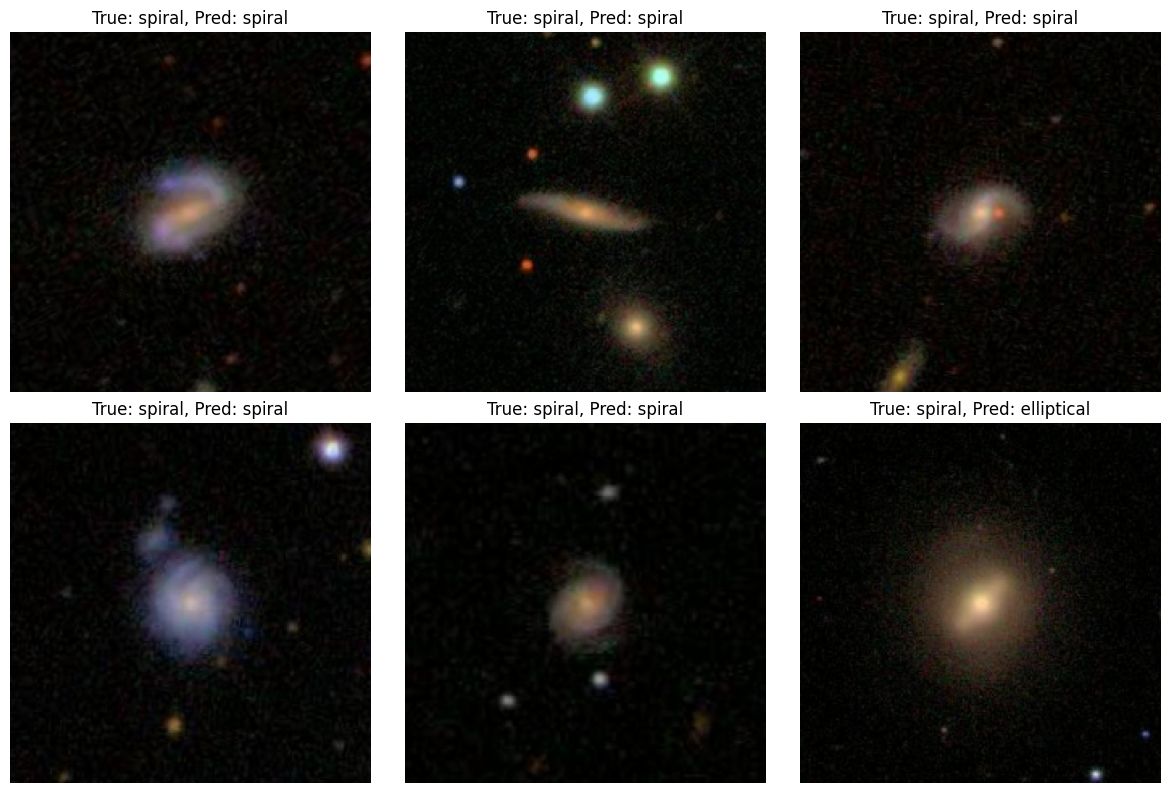

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reset the generator
valid_generator.reset()

# Fetch one batch
img_batch, label_batch = next(valid_generator)

# Predict on the batch
pred_batch = model.predict(img_batch)

# Plot first 6 images from the batch
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i in range(6):
    img = img_batch[i]
    true_label = class_labels[np.argmax(label_batch[i])]
    pred_label = class_labels[np.argmax(pred_batch[i])]

    axes[i].imshow(img)
    axes[i].set_title(f"True: {true_label}, Pred: {pred_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


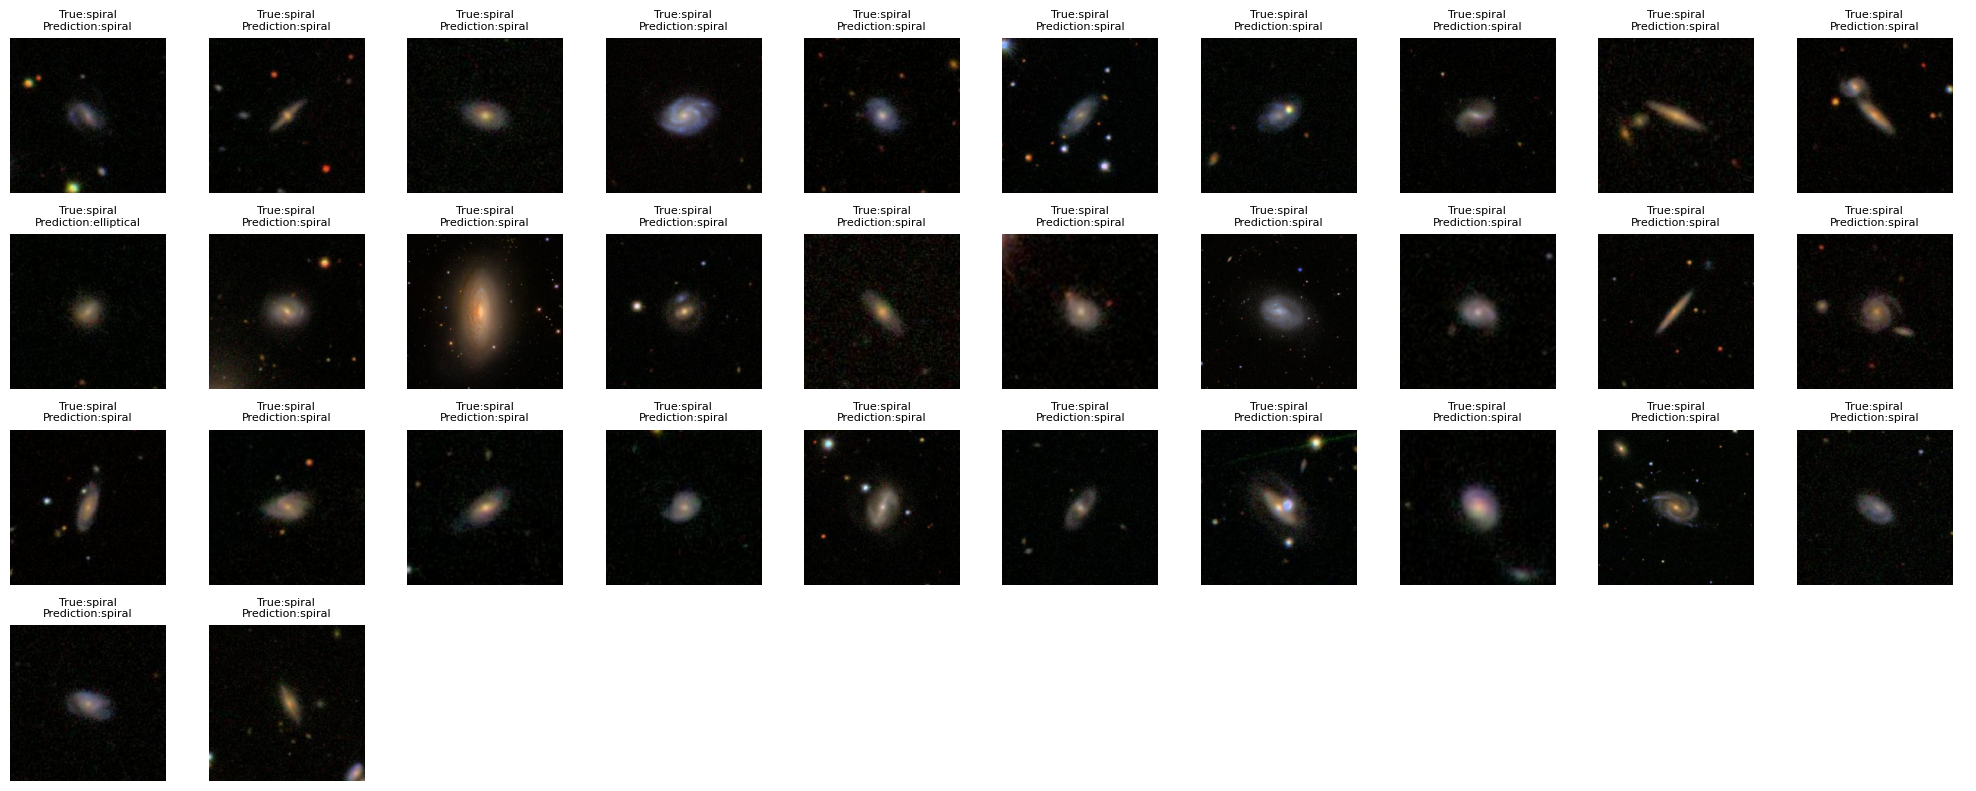

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Reset and fetch batch
valid_generator.reset()
img_batch, label_batch = next(valid_generator)
pred_batch = model.predict(img_batch)

# Number of images in the batch
num_images = len(img_batch)
cols = 10
rows = math.ceil(num_images / cols)

# Plot all images
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i in range(num_images):
    img = img_batch[i]
    true_label = class_labels[np.argmax(label_batch[i])]
    pred_label = class_labels[np.argmax(pred_batch[i])]

    axes[i].imshow(img)
    axes[i].set_title(f"True:{true_label}\nPrediction:{pred_label}", fontsize=8)
    axes[i].axis('off')

# Turn off any unused subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Model 2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model
model2 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,045,698 (11.62 MB)

 Trainable params: 3,011,586 (11.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

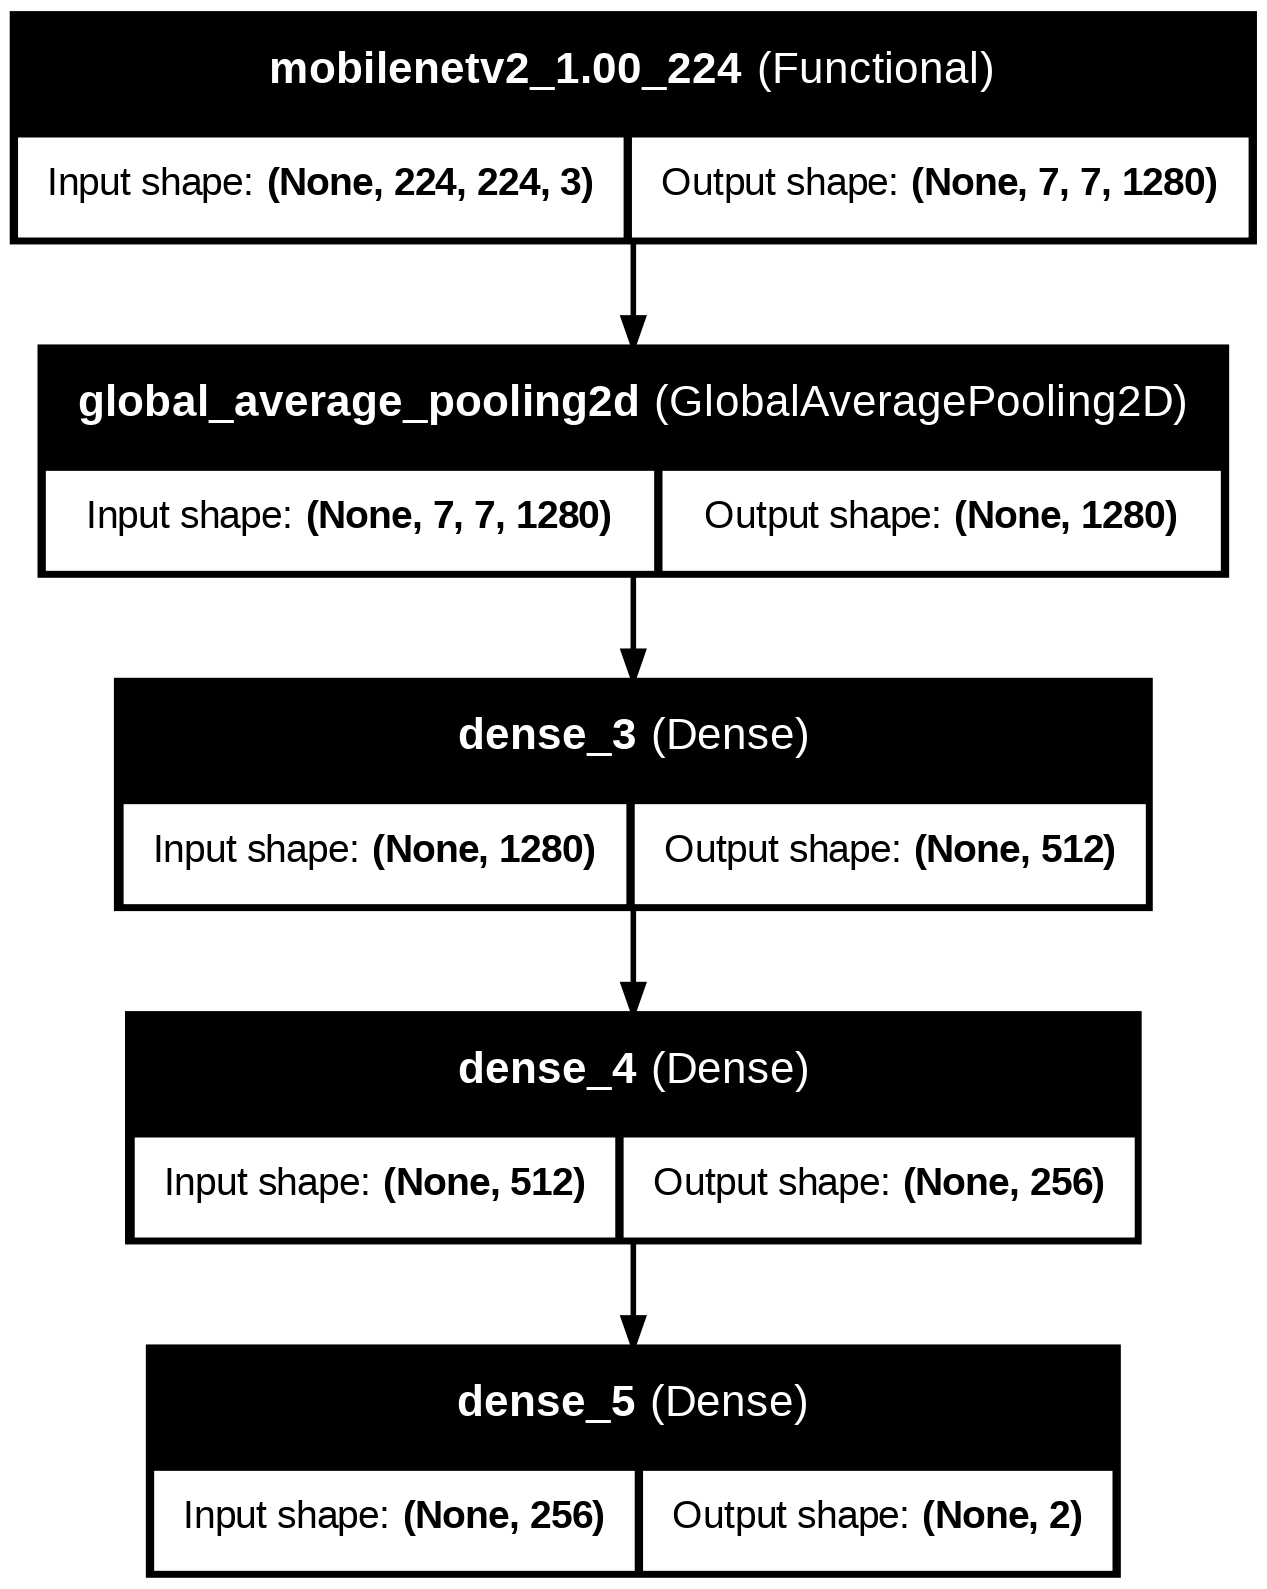

In [ ]:
tf.keras.utils.plot_model(model2, to_file="model2_plot3.png",
                          show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=["accuracy"])

hist_model2 = model2.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator
                 )

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 111s 149ms/step - accuracy: 0.8739 - loss: 0.2938 - val_accuracy: 0.0328 - val_loss: 5.2512
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.9715 - loss: 0.0852 - val_accuracy: 0.0437 - val_loss: 4.3137
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 140ms/step - accuracy: 0.9807 - loss: 0.0515 - val_accuracy: 0.1875 - val_loss: 3.8030
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.3759 - val_loss: 3.9135
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 48s 119ms/step - accuracy: 0.9899 - loss: 0.0255 - val_accuracy: 0.5088 - val_loss: 3.1143
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.4922 - val_loss: 2.6384
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - accuracy: 0.9957 - loss: 0.0119 - val_accuracy: 0.5966 - val_loss: 2.8172
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 123ms/step - accuracy: 0.9952 - loss: 

In [ ]:
final_train_acc2 = hist_model2.history['accuracy'][-1]
final_val_acc2 = hist_model2.history['val_accuracy'][-1]

print(f"Final Training Accuracy (model2): {final_train_acc2:.4f}")
print(f"Final Validation Accuracy (model2): {final_val_acc2:.4f}")

Final Training Accuracy (model2): 0.9959
Final Validation Accuracy (model2): 0.9275


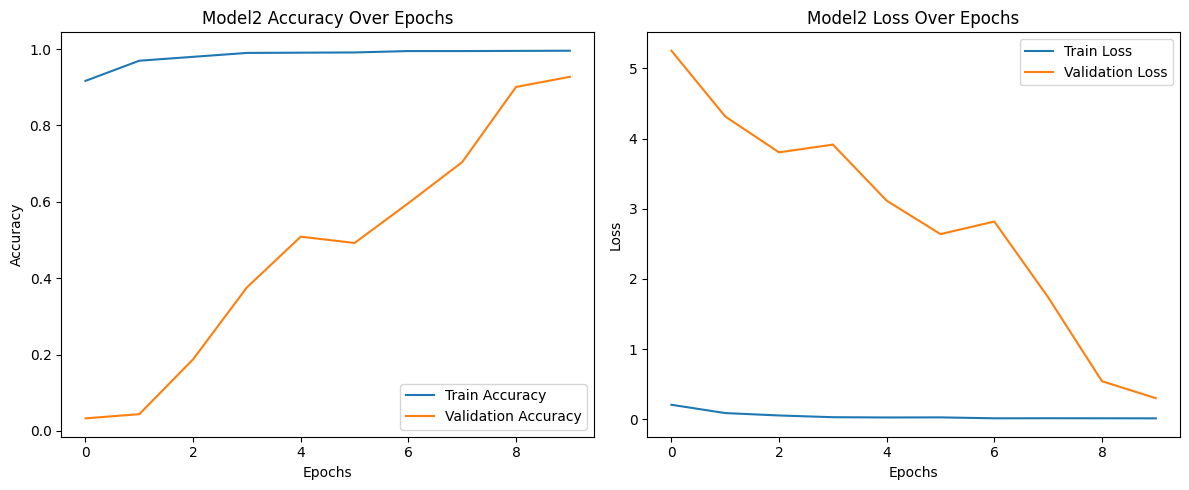

In [ ]:
import matplotlib.pyplot as plt

# Accuracy and Loss plots
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(hist_model2.history['accuracy'], label='Train Accuracy')
plt.plot(hist_model2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model2 Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(hist_model2.history['loss'], label='Train Loss')
plt.plot(hist_model2.history['val_loss'], label='Validation Loss')
plt.title('Model2 Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on full validation set
valid_generator.reset()
y_pred_probs2 = model2.predict(valid_generator)
y_pred2 = np.argmax(y_pred_probs2, axis=1)

# True labels
y_true2 = valid_generator.classes

# Detailed report
print("\nClassification Report:")
print(classification_report(y_true2, y_pred2, target_names=class_labels))

# # Confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_true2, y_pred2))


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step

Classification Report:
              precision    recall  f1-score   support

  elliptical       0.00      0.00      0.00         0
      spiral       1.00      0.93      0.96      3200

    accuracy                           0.93      3200
   macro avg       0.50      0.46      0.48      3200
weighted avg       1.00      0.93      0.96      3200


Confusion Matrix:
[[   0    0]
 [ 232 2968]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true2, y_pred2)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import math

# Get a batch
valid_generator.reset()
img_batch2, label_batch2 = next(valid_generator)
pred_batch2 = model2.predict(img_batch2)

# Number of images
num_images2 = len(img_batch2)
cols = 10
rows = math.ceil(num_images2 / cols)

# Plot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i in range(num_images2):
    img = img_batch2[i]
    true_label = class_labels[np.argmax(label_batch2[i])]
    pred_label = class_labels[np.argmax(pred_batch2[i])]

    axes[i].imshow(img)
    axes[i].set_title(f"True:{true_label}\nPredtion:{pred_label}", fontsize=8)
    axes[i].axis('off')

# Hide unused axes
for i in range(num_images2, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


# Model 03- InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
model3 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,714 (87.68 MB)

 Trainable params: 22,949,282 (87.54 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
tf.keras.utils.plot_model(model3, to_file="model3_plot3.png",
                          show_shapes=True, show_layer_names=True)

In [ ]:
model3.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

hist = model3.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 177s 259ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9663 - val_loss: 0.1346
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 109s 252ms/step - accuracy: 0.9990 - loss: 0.0042 - val_accuracy: 0.9634 - val_loss: 0.1558
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 98s 244ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9531 - val_loss: 0.2146
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 97s 244ms/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 0.9737 - val_loss: 0.1386
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 101s 252ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9762 - val_loss: 0.1075
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 139s 245ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9616 - val_loss: 0.2197
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 98s 245ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9784 - val_loss: 0.1170
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 98s 245ms/step - accuracy: 0.9993 - los

In [ ]:
# Final training and validation accuracy
final_train_acc3 = hist.history['accuracy'][-1]
final_val_acc3 = hist.history['val_accuracy'][-1]

print(f"Final Training Accuracy (model3): {final_train_acc3:.4f}")
print(f"Final Validation Accuracy (model3): {final_val_acc3:.4f}")


Final Training Accuracy (model3): 0.9994
Final Validation Accuracy (model3): 0.9663


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model3 Accuracy Over Epochs')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model3 Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
valid_generator.reset()
y_pred_probs3 = model3.predict(valid_generator)
y_pred3 = np.argmax(y_pred_probs3, axis=1)

# Ground truth
y_true3 = valid_generator.classes

# Classification report
print("\nClassification Report (model3):")
print(classification_report(y_true3, y_pred3, target_names=class_labels))

# # Confusion matrix
# print("\nConfusion Matrix (model3):")
# print(confusion_matrix(y_true3, y_pred3))


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step

Classification Report (model3):
              precision    recall  f1-score   support

  elliptical       0.00      0.00      0.00         0
      spiral       1.00      0.97      0.98      3200

    accuracy                           0.97      3200
   macro avg       0.50      0.48      0.49      3200
weighted avg       1.00      0.97      0.98      3200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


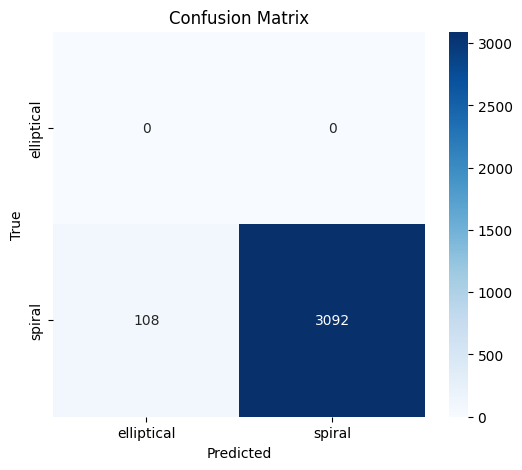

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true3, y_pred3)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import math

# Get a fresh batch
valid_generator.reset()
img_batch3, label_batch3 = next(valid_generator)
pred_batch3 = model3.predict(img_batch3)

# Number of images
num_images3 = len(img_batch3)
cols = 10
rows = math.ceil(num_images3 / cols)

# Plot images
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i in range(num_images3):
    img = img_batch3[i]
    true_label = class_labels[np.argmax(label_batch3[i])]
    pred_label = class_labels[np.argmax(pred_batch3[i])]

    axes[i].imshow(img)
    axes[i].set_title(f"T:{true_label}\nP:{pred_label}", fontsize=8)
    axes[i].axis('off')

# Hide extra axes
for i in range(num_images3, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


# Model 04 - VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model, without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model
model4 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,109,186 (57.64 MB)

 Trainable params: 15,109,186 (57.64 MB)

 Non-trainable params: 0 (0.00 B)

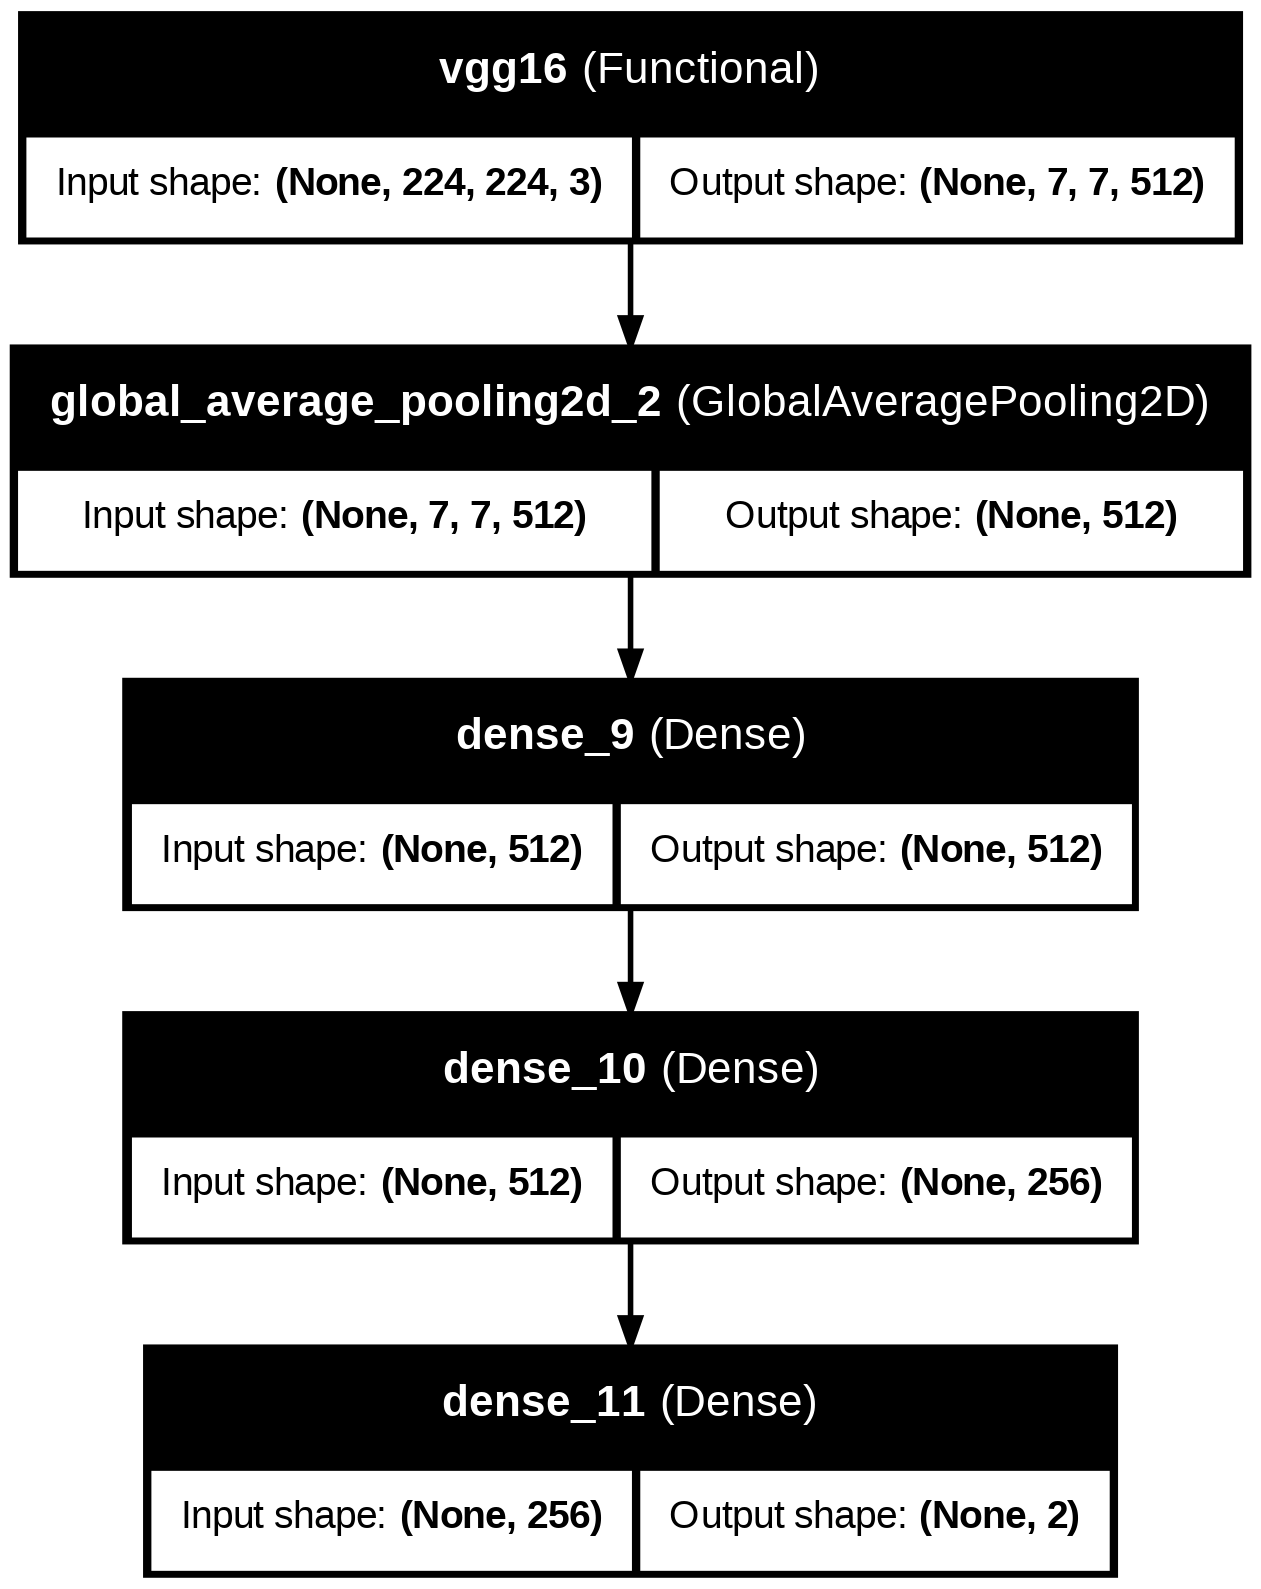

In [ ]:
tf.keras.utils.plot_model(model4, to_file="model4_plot3.png",
                          show_shapes=True, show_layer_names=True)

In [ ]:
model4.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

hist = model4.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 257s 537ms/step - accuracy: 0.8168 - loss: 0.3636 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 203s 509ms/step - accuracy: 0.9734 - loss: 0.0791 - val_accuracy: 0.9784 - val_loss: 0.0631
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 207s 518ms/step - accuracy: 0.9846 - loss: 0.0456 - val_accuracy: 0.9484 - val_loss: 0.1447
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 204s 510ms/step - accuracy: 0.9860 - loss: 0.0400 - val_accuracy: 0.9800 - val_loss: 0.0614
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 207s 517ms/step - accuracy: 0.9889 - loss: 0.0293 - val_accuracy: 0.9875 - val_loss: 0.0336
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 203s 508ms/step - accuracy: 0.9908 - loss: 0.0250 - val_accuracy: 0.9866 - val_loss: 0.0492
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 203s 508ms/step - accuracy: 0.9943 - loss: 0.0157 - val_accuracy: 0.9456 - val_loss: 0.1831
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 263s 510ms/step - accuracy: 0.9959 -

In [ ]:
# Final training and validation accuracy for model4
final_train_acc4 = hist.history['accuracy'][-1]
final_val_acc4 = hist.history['val_accuracy'][-1]

print(f"Final Training Accuracy (model4): {final_train_acc4:.4f}")
print(f"Final Validation Accuracy (model4): {final_val_acc4:.4f}")


Final Training Accuracy (model4): 0.9950
Final Validation Accuracy (model4): 0.9187


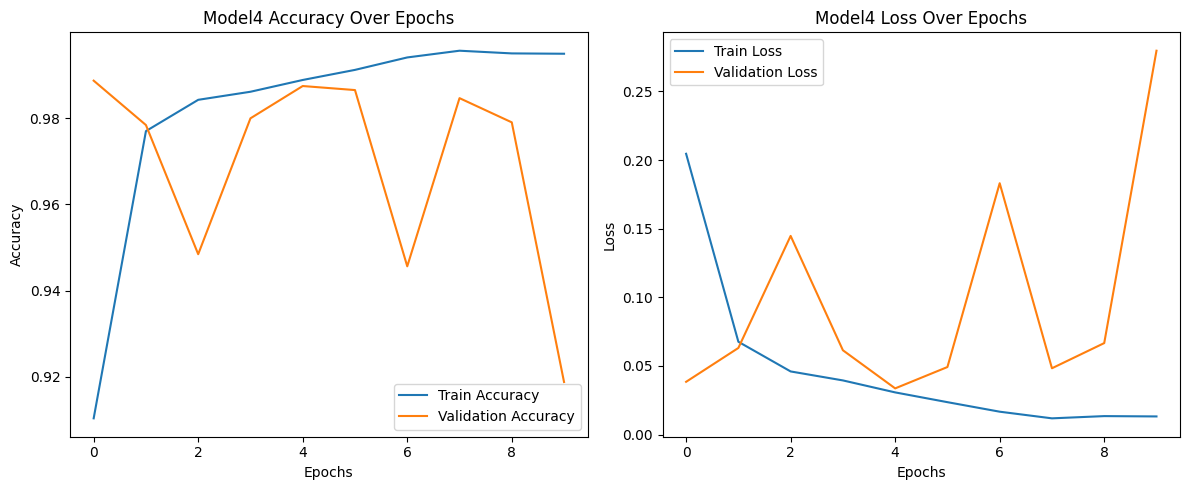

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot for model4
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model4 Accuracy Over Epochs')
plt.legend()

# Loss plot for model4
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model4 Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the validation set
valid_generator.reset()
y_pred_probs4 = model4.predict(valid_generator)
y_pred4 = np.argmax(y_pred_probs4, axis=1)

# Ground truth labels
y_true4 = valid_generator.classes

# # Accuracy score for model4
# acc4 = accuracy_score(y_true4, y_pred4)
# print(f"Validation Accuracy Score (model4): {acc4:.4f}")

# Classification report for model4
print("\nClassification Report (model4):")
print(classification_report(y_true4, y_pred4, target_names=class_labels))

100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step

Classification Report (model4):
              precision    recall  f1-score   support

  elliptical       0.00      0.00      0.00         0
      spiral       1.00      0.92      0.96      3200

    accuracy                           0.92      3200
   macro avg       0.50      0.46      0.48      3200
weighted avg       1.00      0.92      0.96      3200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


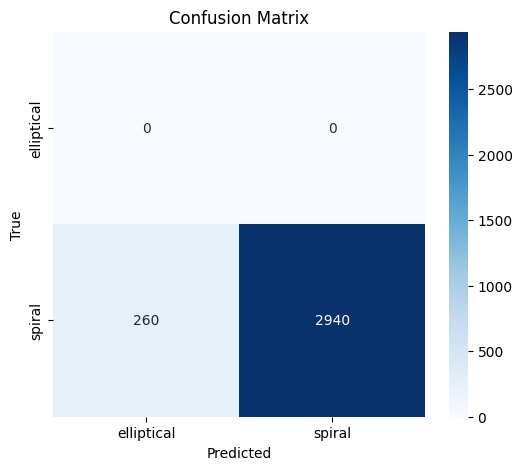

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true4, y_pred4)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


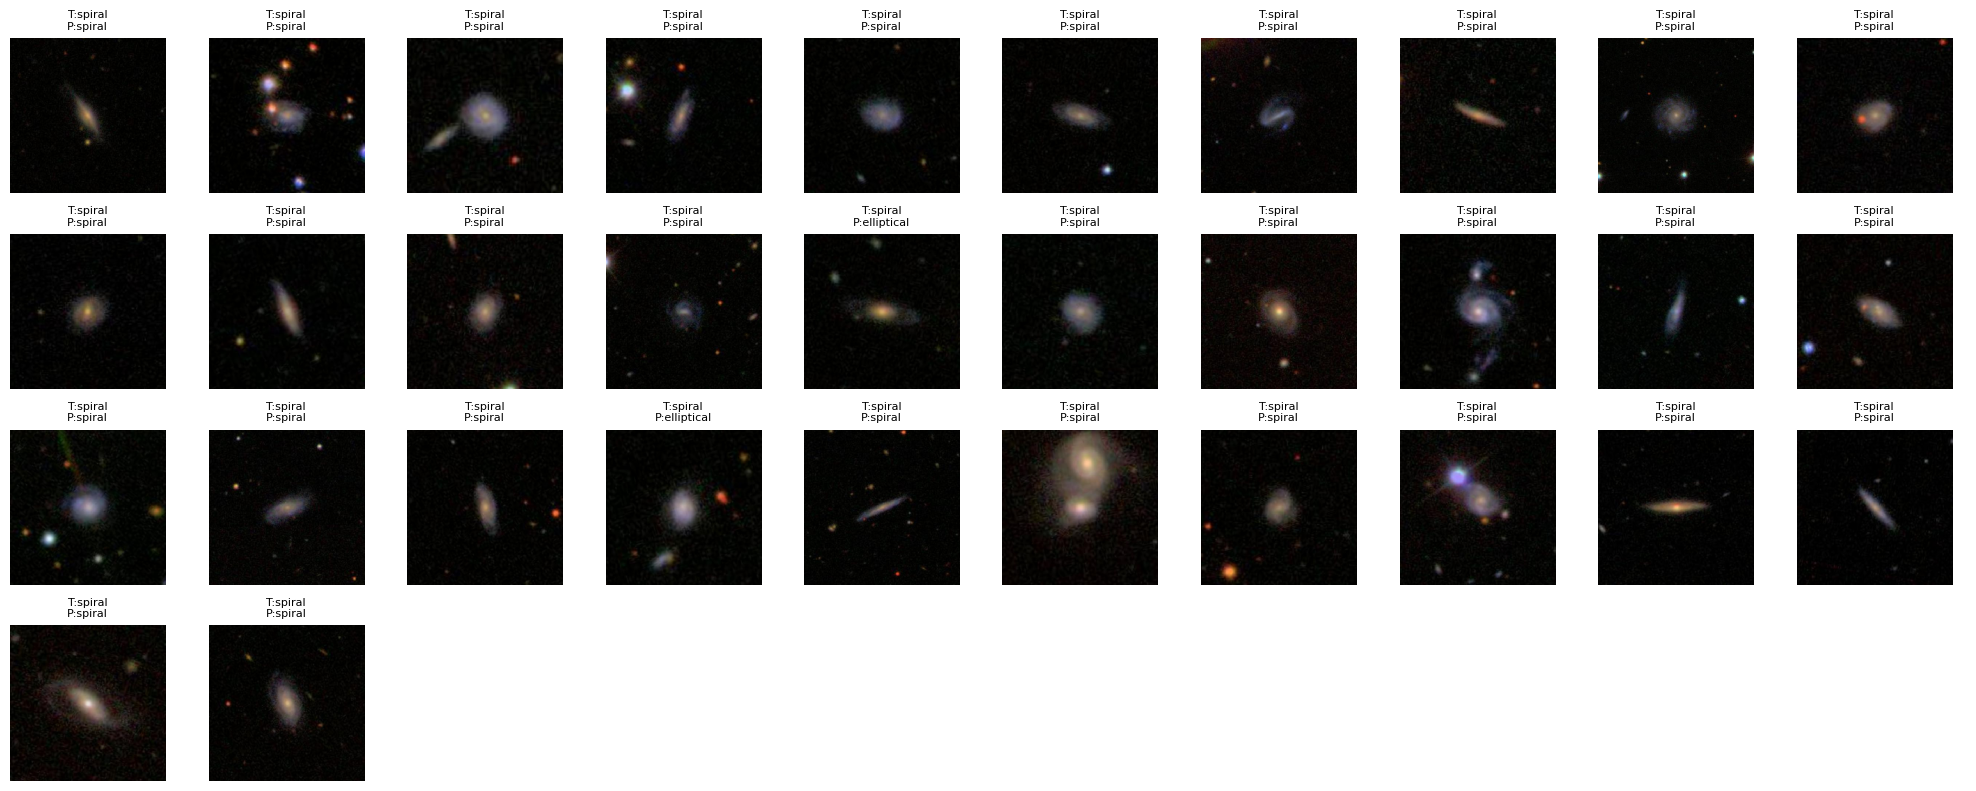

In [ ]:
import math

# Fetch a fresh batch of data
valid_generator.reset()
img_batch4, label_batch4 = next(valid_generator)
pred_batch4 = model4.predict(img_batch4)

# Total number of images in the batch
num_images4 = len(img_batch4)
cols = 10
rows = math.ceil(num_images4 / cols)

# Plot images and predictions
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i in range(num_images4):
    img = img_batch4[i]
    true_label = class_labels[np.argmax(label_batch4[i])]
    pred_label = class_labels[np.argmax(pred_batch4[i])]

    axes[i].imshow(img)
    axes[i].set_title(f"T:{true_label}\nP:{pred_label}", fontsize=8)
    axes[i].axis('off')

# Hide unused axes
for i in range(num_images4, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
